![alt text](https://i.ytimg.com/vi/_tOW_LCB23I/maxresdefault.jpg "The Last Blockbuster")

~~~python
#! pip install sqlalchemy
#! pip install PyMySQL
#! pip install imblearn
~~~

# _Will one of our customers be renting a film next month?_

                                                                                                     Spoiler: they do!

~~~python
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()
~~~

~~~python
pd.set_option('display.max_rows',None)
~~~

# Ok, but Queries first!

### We simply created a series of __*views*__ and then we just *'leftjoined'* them into one simple, nice-looking query

~~~python
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)


data = pd.read_sql_query('''
SELECT *
FROM table_1
LEFT JOIN table_2 using(customer_id)
LEFT JOIN table_3 using(customer_id);
'''
,engine)
data.head(10)
~~~

.

..

...

### But because you are so curious here it is:

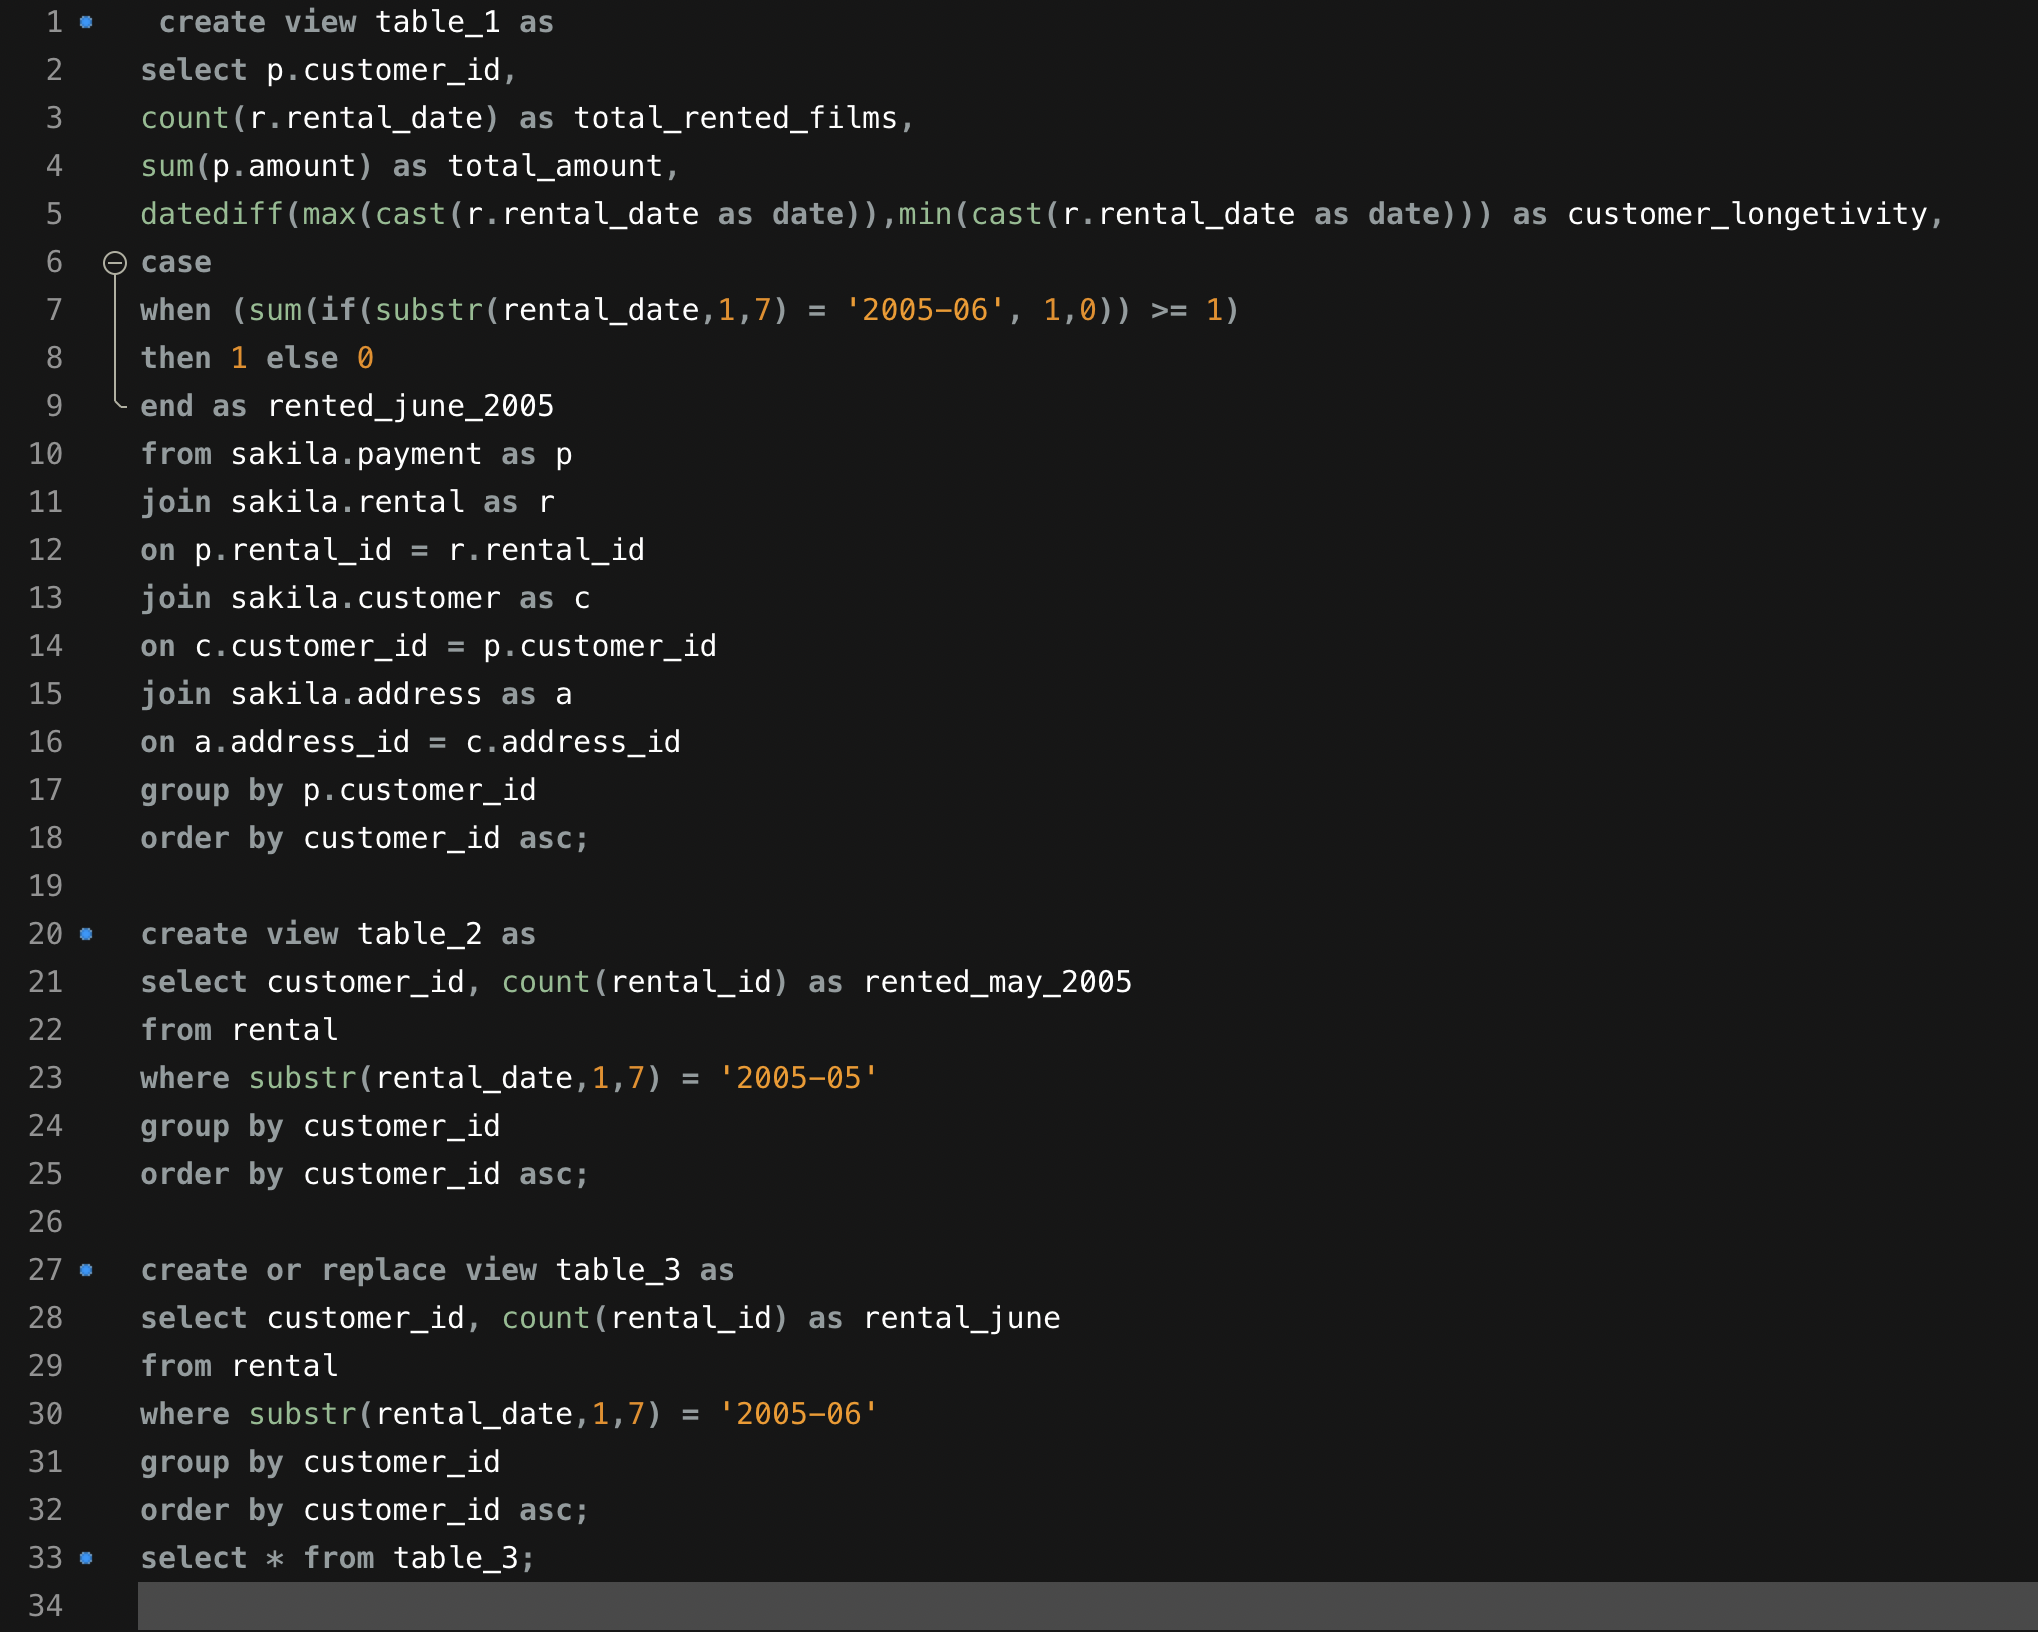

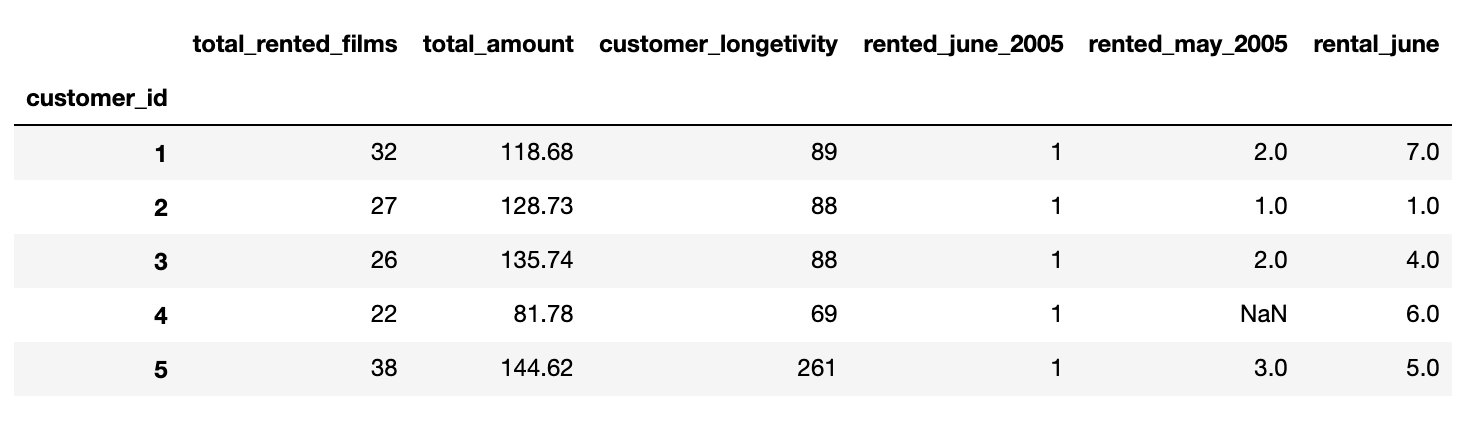


~~~python
data = data.fillna(0)
~~~~

># data.shape = (584, 7)

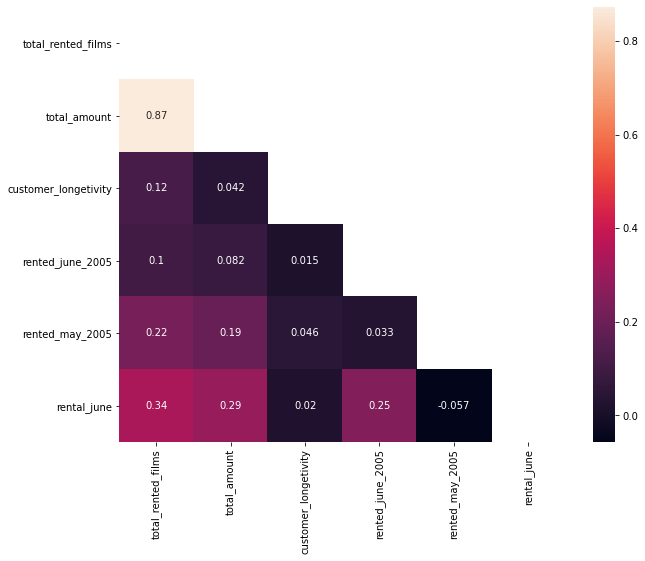

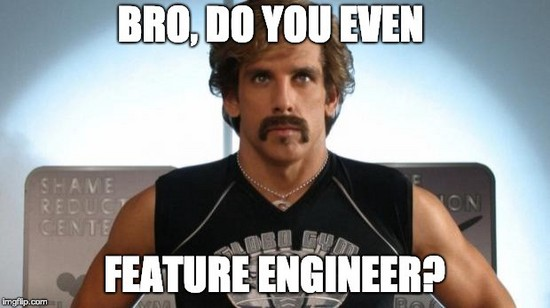

### So we found out our data was kinda' imbalanced...

Rented | Data points
- | -
1 | 575
0 | 9

### But after some 'SMOTE-ing':

Rented | Data points
- | -
1 | 575
0 | 575

In [14]:
y = data['rented_june_2005']
X = data.drop('rented_june_2005', axis=1)

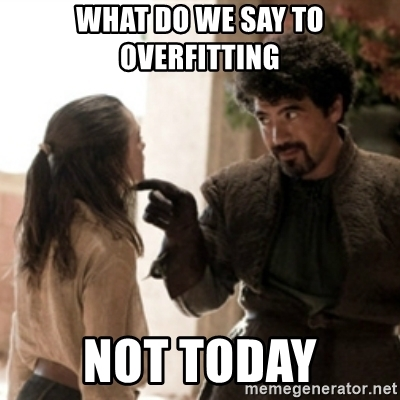

## classification.score(X_test, y_test): 
####               0.9829059829059829

~~~python
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])
~~~~

# _confusing_ matrix:

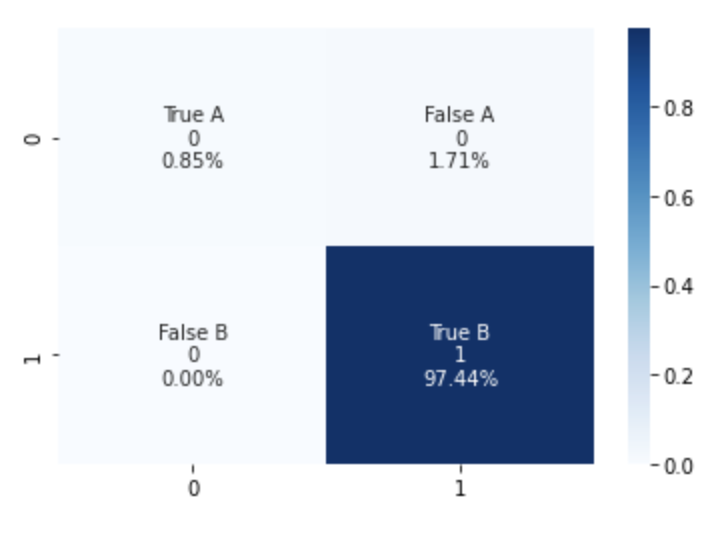

## Conclusion:

##### More columns are needed